In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

### Outliers, Leverag & Influential Points

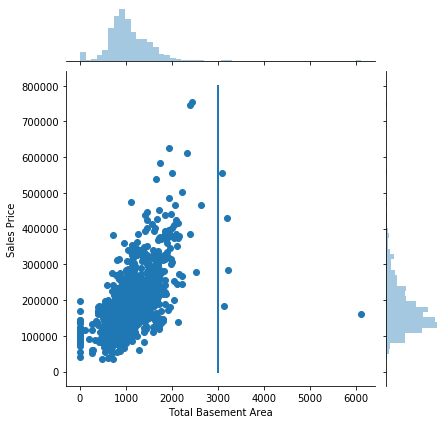

In [4]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train)
s1.ax_joint.plot([3000, 3000], [0, 800000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

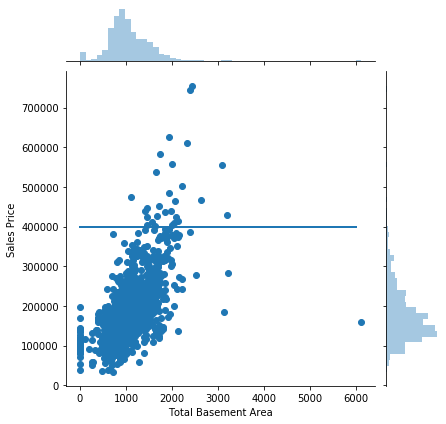

In [5]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train)
s1.ax_joint.plot([0, 6000], [400000, 400000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

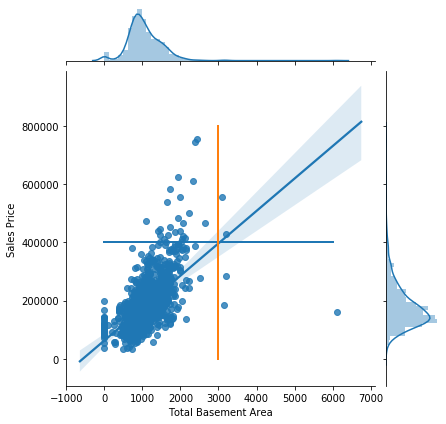

In [6]:
s1 = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train, kind = "reg")
s1.ax_joint.plot([0, 6000], [400000, 400000], linewidth=2)
s1.ax_joint.plot([3000, 3000], [0, 800000], linewidth=2)
s1.set_axis_labels(xlabel="Total Basement Area", ylabel="Sales Price")
plt.show()

### Outliers Detection

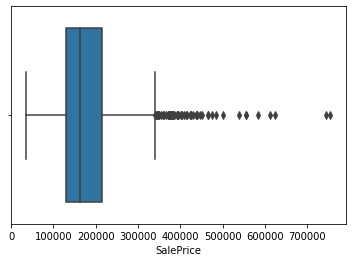

In [11]:
s1 = sns.boxplot(train['SalePrice'], showfliers=True, )
plt.show()

#  iqr

In [12]:
q1 = np.percentile(train["SalePrice"],25)
q3 = np.percentile(train["SalePrice"],75)
iqr = q3-q1
iqr

84025.0

In [13]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(3937.5, 340037.5)

In [16]:
train[(train["SalePrice"]>upper) | (train["SalePrice"]<lower)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500


In [14]:
train[(train["SalePrice"]>upper) | (train["SalePrice"]<lower)].shape[0]

61

In [17]:
train.shape[0]

1460

** There are 61 observations according to Interquartile range that are outliers**

In [18]:
z = (train["SalePrice"] - np.mean(train["SalePrice"]))/np.std(train["SalePrice"])
(np.absolute(z)>2.5).sum()

40

** There are 40 observations which are outliers according to Z-Score**